In [2]:
%load_ext autoreload
%autoreload 2

# EDA Flujo Vehicular en Buenos Aires
1.	Genere una exploración de datos que permita la comprensión de los mismos (gráficos, medidas de tendencia central, mapas). Tenga en cuenta que muchas personas de negocio mirarán su informe por lo cual deberá facilitarles la comprensión del estado de situación


In [1]:
##importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import test_talent.utils.paths as path
from test_talent.utils.talent_utils import check_quality, replace_date, rm_outliers, fixed_coord
# pd.options.display.float_format = '{:,.2f}'.format

### Para este analisis usaremos los datos del flujo vehicular por radar en la ciudad de buenos aires para el anio 2022

Para explorar los datos y facilitar la comprensión, Vamos a utilizar los siguientes métodos y gráficos:

1. Examianr el dataset, cantidad de NA, datos duplicados, limpieza de estos, y fechas sin datos

2. Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora.

3. Análisis de la frecuencia de las columnas Aut_Nombre y Disp_Nombre para identificar las principales autopistas y dispositivos que se encuentran en el dataset.

4. Gráficos de barras para visualizar la distribución de la cantidad de vehículos por día de la semana, hora del día y sección sentido.

5. Histograma para visualizar la distribución de la cantidad de vehículos por día.

6. Mapas interactivos que muestren la ubicación de los dispositivos y su relación con la cantidad de vehículos.

7. Gráficos de línea para visualizar la tendencia de la cantidad de vehículos a lo largo del tiempo.

8. Medidas de tendencia central, como la media y la desviación estándar, para entender el comportamiento de la cantidad de vehículos en general.

Además, es importante proporcionar una breve descripción textual de los resultados de cada análisis, para que las personas de negocios puedan comprender fácilmente la situación actual y tomar decisiones informadas.

## Lectura de datos

In [2]:
# Leemos el archivo de datos
df = pd.read_csv(path.data_raw_dir('flujo-vehicular-por-radares-2021.csv'))
df.info()

/tmp/ipykernel_10847/2994176445.py:2: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path.data_raw_dir('flujo-vehicular-por-radares-2021.csv'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261245 entries, 0 to 261244
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Mes.Día.Año de H_Fecha  261245 non-null  object 
 1   H_Hora                  239228 non-null  float64
 2   Aut Nombre              261245 non-null  object 
 3   Disp Nombre             261245 non-null  object 
 4   Disp Ubicacion          261245 non-null  object 
 5   Seccion Sentido         260541 non-null  object 
 6   Disp Lat                238582 non-null  object 
 7   Disp Lng                238582 non-null  object 
 8   H_Cant_Veh              261245 non-null  int64  
 9   Hora de H_Fecha         22017 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 19.9+ MB


In [3]:
df.sample(10)

Mes.Día.Año de H_Fecha  H_Hora         Aut Nombre  \
158283               03/08/21     0.0  AU 9 de Julio Sur   
249431              8/12/2021     NaN  AU 9 de Julio Sur   
128824               09/06/21    23.0      AU Dellepiane   
80893                18/04/21    16.0  AU 9 de Julio Sur   
202879               04/10/21    10.0  AU 9 de Julio Sur   
257091             22/12/2021     NaN      AU Dellepiane   
143259               14/07/21     1.0  AU 9 de Julio Sur   
130659               26/07/21    10.0      AU 4  Lugones   
11650                10/01/21     5.0       AU 5 Cantilo   
159811               04/08/21    19.0  AU 9 de Julio Sur   

                 Disp Nombre Disp Ubicacion Seccion Sentido   Disp Lat  \
158283      RD125 Osv.Cruz A           0,16               A  -34.65134   
249431          RD130 Suarez           1.16               A   -34.6394   
128824       RD110 Fernandez            4,3               B  -34,65288   
80893         RD136 Yrigoyen           3.57               B  -34.62277   
202879      RD126 Osv.Cruz B           0,16               B  -34.65136   
257091         RD103 Miralla            2.1               B   -34.6699   
143259       RD134 Ituzaingo           2,43               A   -34,6326   
130659         RD165 Dorrego           4,74               A  -34,56336   
11650         RD180 Encalada            7.4               B  -34.54778   
159811  RD127 Ben.Q.Martín A           1,05               A  -34.64357   

         Disp Lng  H_Cant_Veh  Hora de H_Fecha  
158283  -58.37255         346              NaN  
249431  -58.37635        2431             17.0  
128824  -58,46818         100              NaN  
80893   -58.37825         942              NaN  
202879  -58.37266        2684              NaN  
257091  -58.47536        2240             20.0  
143259  -58,37861         215              NaN  
130659  -58,41529        6628              NaN  
11650         NaN         235              NaN  
159811  -58.37568        1928              NaN

## verificacion de calidad de datos

In [4]:
check_quality(df)


Valores NA por columna:
Mes.Día.Año de H_Fecha         0
H_Hora                     22017
Aut Nombre                     0
Disp Nombre                    0
Disp Ubicacion                 0
Seccion Sentido              704
Disp Lat                   22663
Disp Lng                   22663
H_Cant_Veh                     0
Hora de H_Fecha           239228
dtype: int64

Cantidad de datos duplicados:
0

Valores únicos por columna:
Mes.Día.Año de H_Fecha     337
H_Hora                      24
Aut Nombre                   5
Disp Nombre                 29
Disp Ubicacion              71
Seccion Sentido              2
Disp Lat                    86
Disp Lng                    93
H_Cant_Veh                9306
Hora de H_Fecha             24
dtype: int64


In [5]:
# Eliminamos valores NA
df.dropna(subset='H_Cant_Veh', inplace=True)
# Eliminamos la columna que no neesitamos
df.drop(columns=['Hora de H_Fecha','Disp Ubicacion'], inplace=True)
# Eliminamos valores datos duplicados
df.drop_duplicates(inplace=True)

In [6]:
check_quality(df)

Valores NA por columna:
Mes.Día.Año de H_Fecha        0
H_Hora                    21688
Aut Nombre                    0
Disp Nombre                   0
Seccion Sentido             704
Disp Lat                  22663
Disp Lng                  22663
H_Cant_Veh                    0
dtype: int64

Cantidad de datos duplicados:
0

Valores únicos por columna:
Mes.Día.Año de H_Fecha     337
H_Hora                      24
Aut Nombre                   5
Disp Nombre                 29
Seccion Sentido              2
Disp Lat                    86
Disp Lng                    93
H_Cant_Veh                9306
dtype: int64


In [7]:
# Verificamos el tipo de datos en cada columna
print("\nTipo de datos por columna:")
print(df.dtypes)


Tipo de datos por columna:
Mes.Día.Año de H_Fecha     object
H_Hora                    float64
Aut Nombre                 object
Disp Nombre                object
Seccion Sentido            object
Disp Lat                   object
Disp Lng                   object
H_Cant_Veh                  int64
dtype: object


In [8]:
df.columns = ['Fecha','Hora','Auto_Nombre','Dispo_Nombre','Seccion_Sentido','Disp_Lat','Disp_Lng','Cant_Veh']
df.sample(5)

Fecha  Hora        Auto_Nombre          Dispo_Nombre  \
222997  23/11/2021  10.0       AU 5 Cantilo  RD181 Ciudad Univer.   
145780    21/07/21  10.0      AU Dellepiane         RD100 Montiel   
151680    27/07/21   6.0      AU Dellepiane       RD110 Fernandez   
206722    14/10/21  21.0  AU 9 de Julio Sur          RD130 Suarez   
78498     10/04/21  23.0  AU 9 de Julio Sur      RD131 Brandsen B   

       Seccion_Sentido   Disp_Lat   Disp_Lng  Cant_Veh  
222997               B  -34.54362   -58.4464      5306  
145780               A  -34,68411  -58,48264      5191  
151680               B  -34,65288  -58,46818       234  
206722               A   -34.6394  -58.37635      1448  
78498                B  -34.63898  -58.37695      1371

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260916 entries, 0 to 261244
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fecha            260916 non-null  object 
 1   Hora             239228 non-null  float64
 2   Auto_Nombre      260916 non-null  object 
 3   Dispo_Nombre     260916 non-null  object 
 4   Seccion_Sentido  260212 non-null  object 
 5   Disp_Lat         238253 non-null  object 
 6   Disp_Lng         238253 non-null  object 
 7   Cant_Veh         260916 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 17.9+ MB


In [10]:
cols = ['Disp_Lat','Disp_Lng']
for col in cols:
    df[col] = df[col].astype(str).apply(fixed_coord)
    df[col] = df[col].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260916 entries, 0 to 261244
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fecha            260916 non-null  object 
 1   Hora             239228 non-null  float64
 2   Auto_Nombre      260916 non-null  object 
 3   Dispo_Nombre     260916 non-null  object 
 4   Seccion_Sentido  260212 non-null  object 
 5   Disp_Lat         238253 non-null  float64
 6   Disp_Lng         238253 non-null  float64
 7   Cant_Veh         260916 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ MB


In [12]:
df = df.groupby(['Fecha','Hora','Auto_Nombre','Dispo_Nombre','Seccion_Sentido']).agg({'Disp_Lat':'mean', 'Disp_Lng':'mean','Cant_Veh':'sum'}).reset_index()

In [13]:
# arreglar la fecha
df['Fecha'] = df['Fecha'].apply(replace_date)
# covertir a formato fecha
df['Fecha'] = pd.to_datetime(df["Fecha"], format='%d/%m/%Y')
# creamos una variable para ayudarnos a hacer el analisis
df["Dia"] = df["Fecha"].dt.day_name()
df["Mes"] = df["Fecha"].dt.month_name()
#cambio a variables categoricas
cols = ['Hora','Auto_Nombre','Dispo_Nombre','Seccion_Sentido', 'Dia']
for col in cols:
    df[col] = df[col].astype('category')
df['Dia'] = pd.Categorical(df['Dia'],ordered=True, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [14]:
# Verificamos la descripción estadística de las columnas numéricas
print("\nDescripción estadística:")
df.describe(include='all')


Descripción estadística:


/tmp/ipykernel_10847/2135437584.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


Fecha      Hora    Auto_Nombre     Dispo_Nombre  \
count                215861  215861.0         215861           215861   
unique                  306      24.0              4               28   
top     2021-09-02 00:00:00      12.0  AU Dellepiane  RD134 Ituzaingo   
freq                    798    9009.0          74677            14488   
first   2021-01-01 00:00:00       NaN            NaN              NaN   
last    2021-11-30 00:00:00       NaN            NaN              NaN   
mean                    NaN       NaN            NaN              NaN   
std                     NaN       NaN            NaN              NaN   
min                     NaN       NaN            NaN              NaN   
25%                     NaN       NaN            NaN              NaN   
50%                     NaN       NaN            NaN              NaN   
75%                     NaN       NaN            NaN              NaN   
max                     NaN       NaN            NaN              NaN   

       Seccion_Sentido       Disp_Lat       Disp_Lng       Cant_Veh     Dia  \
count           215861  215861.000000  215861.000000  215861.000000  215861   
unique               2            NaN            NaN            NaN       7   
top                  B            NaN            NaN            NaN  Friday   
freq            110224            NaN            NaN            NaN   31210   
first              NaN            NaN            NaN            NaN     NaN   
last               NaN            NaN            NaN            NaN     NaN   
mean               NaN     -34.619347     -58.430380    2599.606691     NaN   
std                NaN       0.051109       0.041832    2361.676383     NaN   
min                NaN     -34.684110     -58.482640       0.000000     NaN   
25%                NaN     -34.653690     -58.468180     678.000000     NaN   
50%                NaN     -34.640760     -58.442240    1985.000000     NaN   
75%                NaN     -34.560440     -58.378250    3858.000000     NaN   
max                NaN     -34.537090     -58.372550   18160.000000     NaN   

            Mes  
count    215861  
unique       10  
top     January  
freq      22663  
first       NaN  
last        NaN  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [16]:
df.sample(10)

Fecha  Hora        Auto_Nombre      Dispo_Nombre Seccion_Sentido  \
74853  2021-05-12   0.0  AU 9 de Julio Sur  RD126 Osv.Cruz B               B   
64412  2021-10-10   0.0      AU 4  Lugones     RD165 Dorrego               A   
56817  2021-09-09   7.0      AU Dellepiane     RD103 Miralla               B   
190114 2021-07-28  14.0      AU Dellepiane     RD103 Miralla               B   
109320 2021-03-17  15.0  AU 9 de Julio Sur    RD136 Yrigoyen               B   
35829  2021-07-06   3.0  AU 9 de Julio Sur  RD126 Osv.Cruz B               B   
7932   2021-04-02   0.0  AU 9 de Julio Sur  RD131 Brandsen B               B   
146008 2021-04-22  10.0  AU 9 de Julio Sur   RD129 Olavarria               B   
127278 2021-09-19   2.0      AU Dellepiane     RD103 Miralla               B   
117381 2021-04-18  23.0       AU 5 Cantilo    RD180 Encalada               B   

        Disp_Lat  Disp_Lng  Cant_Veh        Dia        Mes  
74853  -34.65136 -58.37266       469  Wednesday        May  
64412  -34.56336 -58.41529      2003     Sunday    October  
56817  -34.66990 -58.47536      1560   Thursday  September  
190114 -34.66990 -58.47536      2629  Wednesday       July  
109320 -34.62277 -58.37825      1417  Wednesday      March  
35829  -34.65136 -58.37266       161    Tuesday       July  
7932   -34.63898 -58.37695      1386     Friday      April  
146008 -34.64076 -58.37651      2963   Thursday      April  
127278 -34.66990 -58.47536       651     Sunday  September  
117381 -34.54778 -58.43848       185     Sunday      April

### 2. Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora

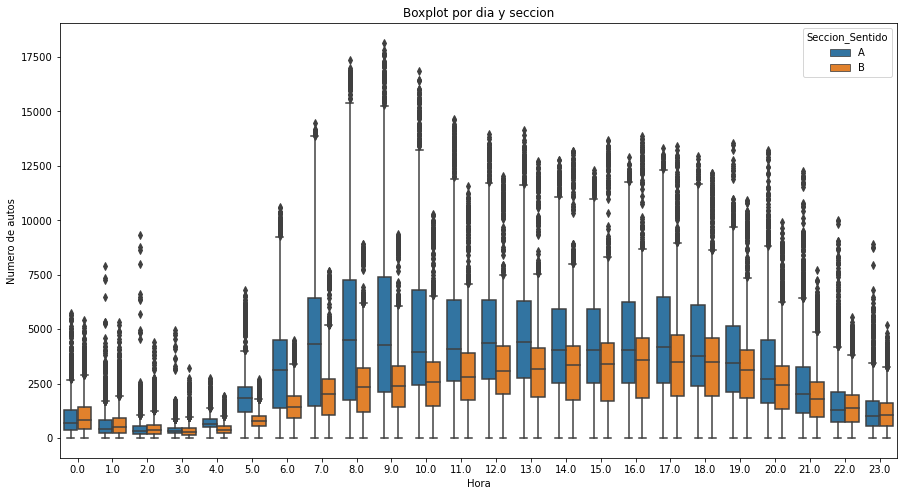

In [17]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Hora", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

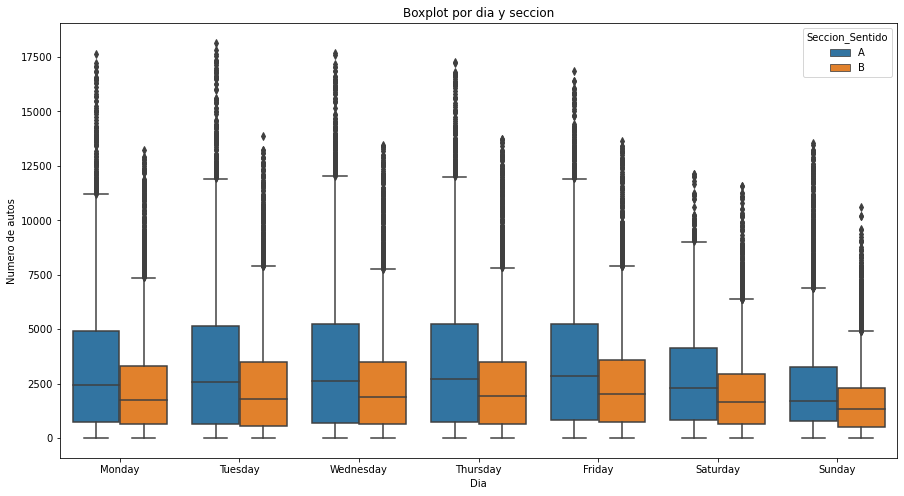

In [18]:
# Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Dia", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

In [19]:
# remove outliers
df = rm_outliers(df,'Cant_Veh')

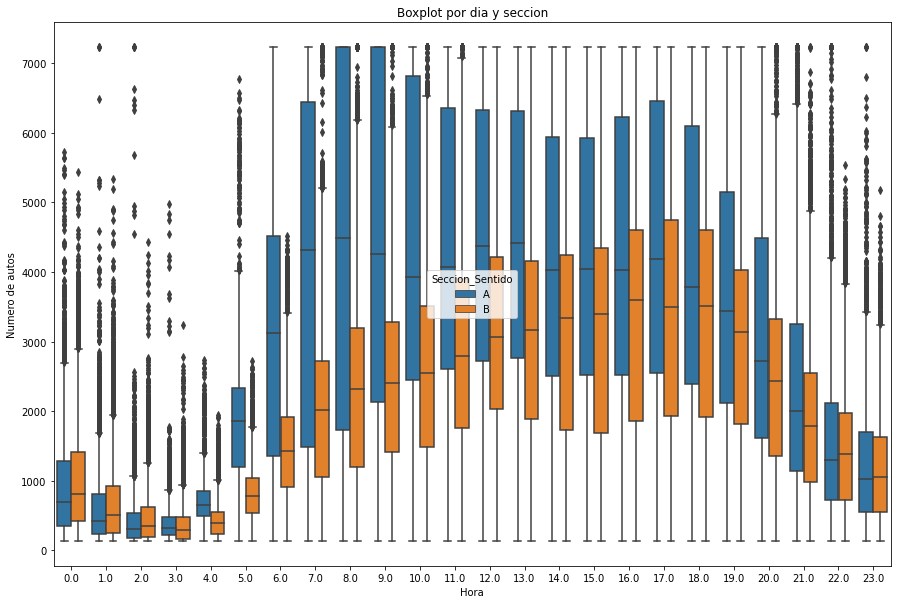

In [20]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df,x="Hora", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

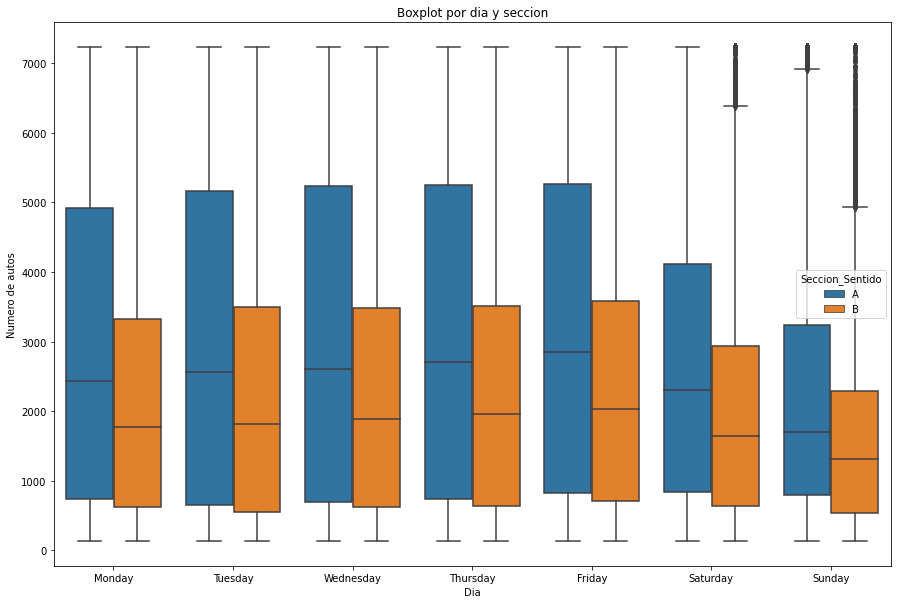

In [21]:
# Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora
plt.figure(figsize = (15, 10))
sns.boxplot(data = df,x="Dia", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

## 3. Analisis de datos
- Trabajaremos con la mediana para evitar datos anomalos ocacionado por desvios ocacionados por marchas o eventos muy puntuales.
- No usaremos la suma por que hay varios dispositivos en una misma autopista lo que nos llevaria a duplicar los datos en el analisis, sumando un vehiculo varias veces cuando en realidad es solo un conteo

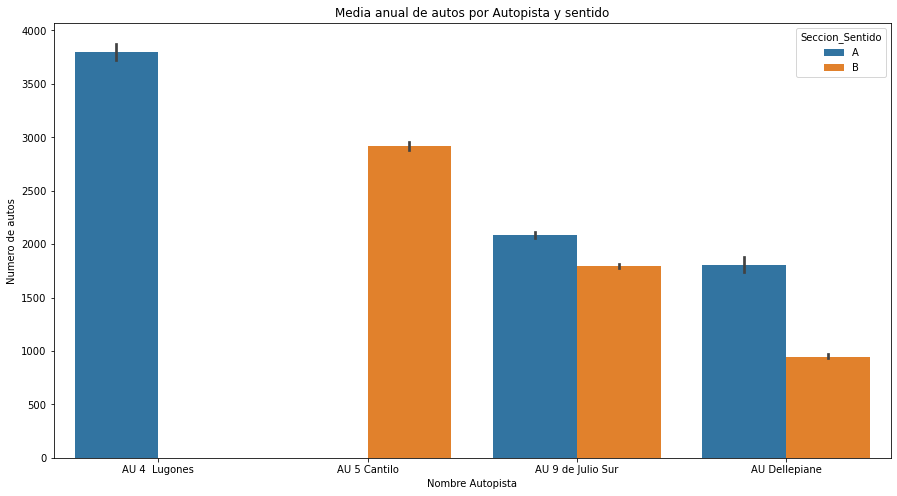

In [22]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Auto_Nombre', y='Cant_Veh',hue='Seccion_Sentido', estimator=np.median)
plt.xlabel('Nombre Autopista')
plt.ylabel('Numero de autos')
plt.title('Media anual de autos por Autopista y sentido')
plt.show()

1. La mediana anual de cantidad de vehiculos varia entre cada autopista y en algunas incluso entre secciones y esto se ve reflejado en la suma total de vehiculos por autopista
2. Observamso que existe informacion faltantes para las autopistas AU 4 Lugones y AU 5 Cantillo en las secciones B y A respectivamente, lo que nos deja 2 opciones:
    - es una via de un solo sentido
    - no hay un dispositivo que mida el sentio contraio de esta auotpista.
3. Este resultados da un panorama de lo que puede dificultar a la hora de generar un modelo y como su precision de la cantidad de autos por seccion en cada autopista puede generar datos erroneos que tendremos que evaluar.

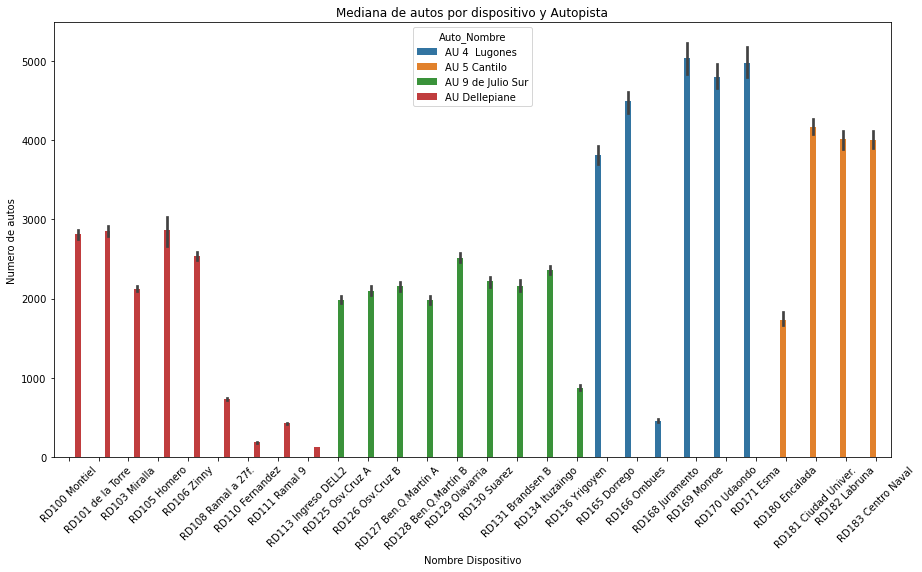

In [ ]:
#data
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dispo_Nombre', y='Cant_Veh',hue='Auto_Nombre',estimator=np.median)
plt.xlabel('Nombre Dispositivo')
plt.ylabel('Numero de autos')
plt.title('Mediana de autos por dispositivo y Autopista')
plt.xticks(rotation=45)
plt.show()

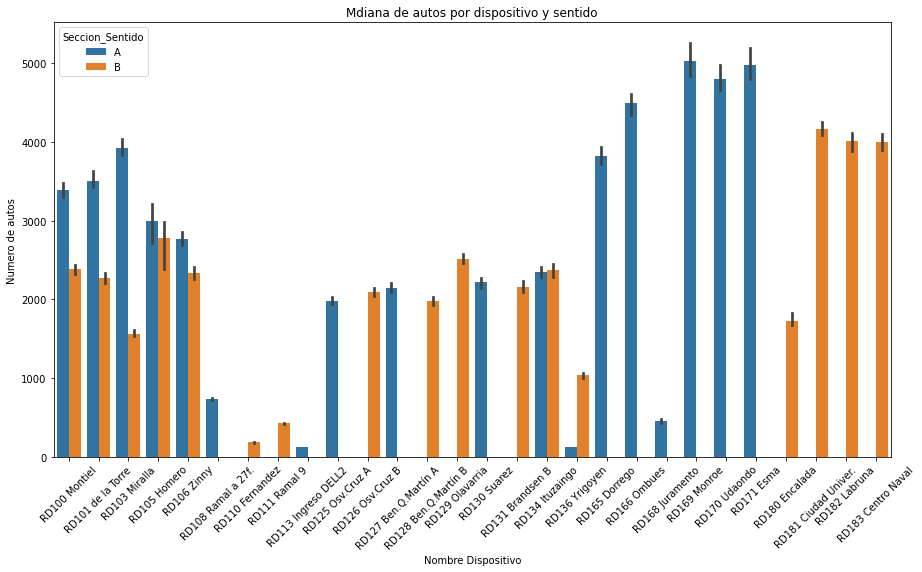

In [ ]:
#data
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dispo_Nombre', y='Cant_Veh',hue='Seccion_Sentido', estimator=np.median)
plt.xlabel('Nombre Dispositivo')
plt.ylabel('Numero de autos')
plt.title('Mdiana de autos por dispositivo y sentido')
plt.xticks(rotation=45)
plt.show()

podemos ver que cada dispositivo tiene un transito de vehiculos diferentes:
- Todos los dispositivos ubicados en cantillo y lugones miden un solo sentido de cada autopista, lo que nos da mayor fuerza para asumir que estas autopistas tienen solo un sentido. 
- Empezamos a ver como cada dispositivo tiene diferencial al moemtno de medir la cantidad de vehiculos.

# Gráficos de barras para visualizar la distribución de la cantidad de vehículos por día de la semana, hora del día y sección sentido


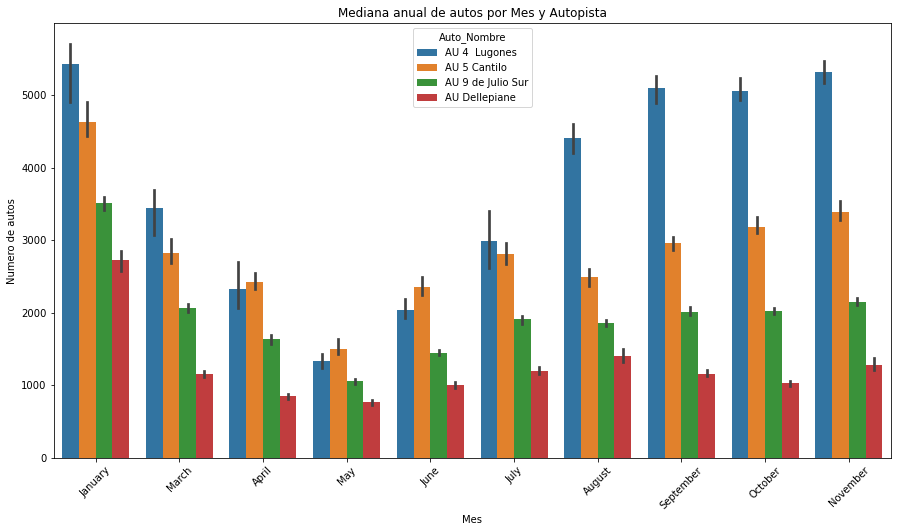

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Mes', y='Cant_Veh',hue='Auto_Nombre', estimator=np.median)
plt.xlabel('Mes')
plt.ylabel('Numero de autos')
plt.title('Mediana anual de autos por Mes y Autopista')
plt.xticks(rotation=45)
plt.show()

Observamos que:
- No existe informacion de febrero y diciembre
- de enero a mayo hay un contraccion del flujo vehicular
- El mes de menos flujo cehicular fue Mayo
- Despues de mayo se incremento gradualmente el trafico hasta noviembre
- El mes de mas flujo vehicular fue el Enero

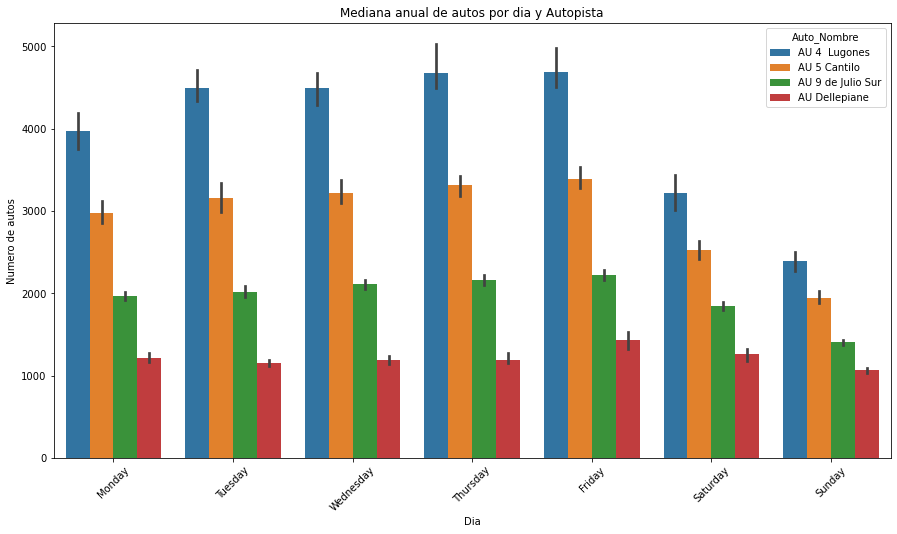

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dia', y='Cant_Veh',hue='Auto_Nombre', estimator=np.median)
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Mediana anual de autos por dia y Autopista')
plt.xticks(rotation=45)
plt.show()

Observamos que:
- los dias laborales es cuando mas trafico existe
- los fines de semana hay una contraccion del flujo vehicular
- El dia de mas flujo cehicular fue el Viernes
- El dia de menos flujo cehicular fue el domingo

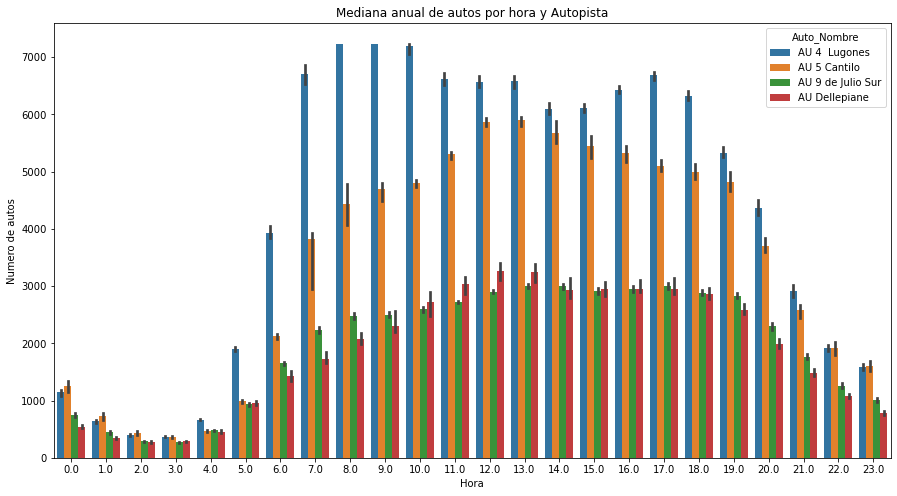

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Hora', y='Cant_Veh',hue='Auto_Nombre', estimator=np.median)
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('Mediana anual de autos por hora y Autopista')
# plt.xticks(rotation=45)
plt.show()

Observamos que:
- las horas laborales es cuando mas trafico existe
- desde las 19 horas hasta las 5 horas hay una contraccion del flujo vehicular
- La hora de mas flujo vehicular fue a las 13 horas
- El hora de menos flujo vehicular fue a las 3 horas
- La autopista lugones tiene un comportamiento bimodal, mientras que las demas tienen un comportamiento de forma normal

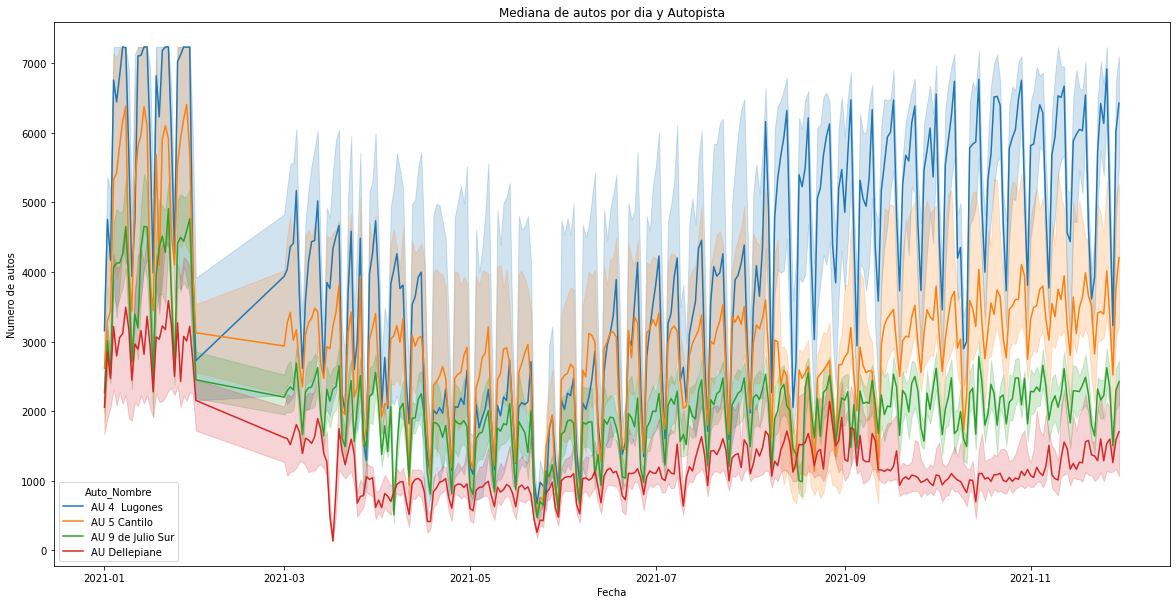

In [ ]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x= 'Fecha', y= 'Cant_Veh',hue='Auto_Nombre',estimator= np.median)
plt.xlabel('Fecha')
plt.ylabel('Numero de autos')
plt.title('Mediana de autos por dia y Autopista')
# plt.xticks(rotation=45)
plt.show()

Observamos que:
- las autopistas tienen un comportamiento similar en lo corrido del ano
- no hay datos en febrero, lo cual nos lleva a usar de marzo a noviembre para hacer el modelo de prediccion de vehiculos.
- se pueden observar las tendencias mensuales y semanales en el incremnto de vehiculos. 

## Analisis espacial

Se pueden realizar diversos análisis espaciales con la información que se tiene en el dataset, tales como:

- Mapas de calor: se pueden crear mapas de calor que muestren la concentración de vehículos en diferentes ubicaciones.

- Análisis de Cluster: se puede identificar patrones en la distribución de los vehículos a lo largo del tiempo utilizando técnicas de agrupamiento.

- Mapas de ubicación: se pueden crear mapas que muestren la ubicación de los dispositivos de monitoreo y la cantidad de vehículos que pasan por esas ubicaciones.

- Análisis de densidad: se pueden realizar análisis de densidad para identificar áreas con alta concentración de vehículos.

- Análisis de redes: se pueden realizar análisis de redes para identificar patrones en la distribución de los vehículos en el tiempo y cómo varían a lo largo del tiempo.

- Autocorrelacion espacial: Se refiere a la relación entre las variables en diferentes ubicaciones geográficas. En este caso, la autocorrelación espacial podría ser útil para examinar la relación entre la cantidad de vehículos y la ubicación de los dispositivos de monitoreo. Por ejemplo, se puede calcular la correlación espacial entre la cantidad de vehículos y la distancia a otras ubicaciones de monitoreo. Esto puede ayudar a identificar patrones en la distribución del flujo vehicular y cómo estos patrones varían a lo largo del tiempo y en diferentes ubicaciones.

Estos análisis ayudarían a visualizar la distribución y tendencias del flujo vehicular en diferentes ubicaciones, lo que puede ser útil para la planificación del transporte y la toma de decisiones en el futuro.

### Por temas de tiempo solo realizare la visualizacion espaciotemporal de la cantidad de vehiculos por dia

In [ ]:
group = df[['Disp_Lat','Disp_Lng','Cant_Veh','Fecha']]
group = group.groupby('Fecha')
array=[]
time_index=[]
for key, group in group:
    time_index.append(str(key))
    array.append(np.array(group[['Disp_Lat','Disp_Lng','Cant_Veh']]))
array = [i.tolist() for i in array]

In [ ]:
# Mapas interactivos que muestren la ubicación de los dispositivos y su relación con la cantidad de vehículos
import folium
import folium.plugins as plugins
## creamos un mapa con folium que sea dinamico para ver el hotsplot por dia de nuestros datos.
m = folium.Map(location=[group["Disp_Lat"].mean(), group["Disp_Lng"].mean()], tiles="stamentoner", zoom_start=12)

hm = plugins.HeatMapWithTime(array, index=time_index, auto_play=True, max_opacity=0.3) #heatmap diario y con auto play

hm.add_to(m)# lo agregamos al mapa base

m # lo publicamos o mostramos



Exportamos el dataset limpio y listo para crear el modelo

In [23]:
df

Fecha  Hora    Auto_Nombre         Dispo_Nombre Seccion_Sentido  \
0      2021-01-01   0.0  AU 4  Lugones        RD165 Dorrego               A   
1      2021-01-01   0.0  AU 4  Lugones         RD166 Ombues               A   
2      2021-01-01   0.0  AU 4  Lugones      RD168 Juramento               A   
3      2021-01-01   0.0  AU 4  Lugones         RD169 Monroe               A   
4      2021-01-01   0.0  AU 4  Lugones        RD170 Udaondo               A   
...           ...   ...            ...                  ...             ...   
215856 2021-11-09  23.0  AU Dellepiane        RD103 Miralla               B   
215857 2021-11-09  23.0  AU Dellepiane   RD108 Ramal a 27f.               A   
215858 2021-11-09  23.0  AU Dellepiane      RD110 Fernandez               B   
215859 2021-11-09  23.0  AU Dellepiane        RD111 Ramal 9               B   
215860 2021-11-09  23.0  AU Dellepiane  RD113 Ingreso DELL2               A   

        Disp_Lat  Disp_Lng  Cant_Veh      Dia       Mes  
0      -34.56336 -58.41529    1296.0   Friday   January  
1      -34.56044 -58.41908    1576.0   Friday   January  
2      -34.54977 -58.43602     132.0   Friday   January  
3      -34.54629 -58.44224    1860.0   Friday   January  
4      -34.54293 -58.44901    1842.0   Friday   January  
...          ...       ...       ...      ...       ...  
215856 -34.66990 -58.47536     857.0  Tuesday  November  
215857 -34.65369 -58.46812     333.0  Tuesday  November  
215858 -34.65288 -58.46818     226.0  Tuesday  November  
215859 -34.65061 -58.46677     186.0  Tuesday  November  
215860 -34.65134 -58.46643     132.0  Tuesday  November  

[215861 rows x 10 columns]

In [37]:
data = df.groupby(['Fecha','Hora','Auto_Nombre'])['Cant_Veh'].median().reset_index()
data.dropna(inplace=True)
data = data[data['Fecha']>='2021-03-01']
data['Hora'] = data['Hora'].astype(int)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26394 entries, 2976 to 29375
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        26394 non-null  datetime64[ns]
 1   Hora         26394 non-null  int64         
 2   Auto_Nombre  26394 non-null  category      
 3   Cant_Veh     26394 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 850.8 KB


In [39]:
# Convertir la fecha y la hora a variables numéricas
data['dia'] = data['Fecha'].dt.weekday
data['mes'] = data['Fecha'].dt.month
data['anio'] = data['Fecha'].dt.year

In [40]:
data.isna().sum()

Fecha          0
Hora           0
Auto_Nombre    0
Cant_Veh       0
dia            0
mes            0
anio           0
dtype: int64

In [41]:
data.to_csv(path.data_processed_dir('data_clean.csv'), index=False)

In [42]:
data

Fecha  Hora        Auto_Nombre  Cant_Veh  dia  mes  anio
2976  2021-03-01     0      AU 4  Lugones    2218.5    0    3  2021
2977  2021-03-01     0       AU 5 Cantilo    1894.0    0    3  2021
2978  2021-03-01     0  AU 9 de Julio Sur    1160.5    0    3  2021
2979  2021-03-01     0      AU Dellepiane    1187.0    0    3  2021
2980  2021-03-01     1      AU 4  Lugones     884.0    0    3  2021
...          ...   ...                ...       ...  ...  ...   ...
29371 2021-11-30    22      AU Dellepiane    1580.0    1   11  2021
29372 2021-11-30    23      AU 4  Lugones    2365.0    1   11  2021
29373 2021-11-30    23       AU 5 Cantilo    3304.5    1   11  2021
29374 2021-11-30    23  AU 9 de Julio Sur    1489.0    1   11  2021
29375 2021-11-30    23      AU Dellepiane    1064.0    1   11  2021

[26394 rows x 7 columns]